In [6]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt



# Business Problem:

CommonLit, Inc., is a nonprofit education technology organization serving over 20
million teachers and students with free digital reading and writing lessons for grades
3-12. Together with Georgia State University, an R1 public research university in
Atlanta, they are challenging Kagglers to improve readability rating methods.




Currently, most educational texts are matched to readers using traditional readability
methods or commercially available formulas. However, each has its issues. Tools like
Flesch-Kincaid Grade Level are based on weak proxies of text decoding (i.e.,
characters or syllables per word) and syntactic complexity (i.e., number or words per
sentence). As a result, they lack construct and theoretical validity. At the same time,
commercially available formulas, such as Lexile, can be cost-prohibitive, lack suitable
validation studies, and suffer from transparency issues when the formula's features
aren't publicly available.





So the CommonLit organization conducted this challenge to use the Machine learning
skills to rate the educational texts and engage the students with texts of the right level of
challenge which can help them to develop good reading skills.
In this competition, we shall build the ML models to rate the complexity of reading
passages for grade 3-12 classroom use with the help of the vast dataset provided that
includes readers from a wide variety of age groups and a large collection of texts taken
from various domains.

#Performance metric:

Submissions are scored on the root mean squared error. RMSE is defined as:

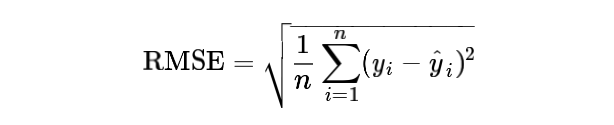

where ˆy is the predicted value, y is the original value, and n is the number of rows in
the test data.

Problem Statement:

#Loading Data

In [8]:
train_data = pd.read_csv('/content/drive/MyDrive/CS2/train.csv/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/CS2/test.csv')

# removing unused columns
train_data.drop(['url_legal', 'license'], axis=1, inplace=True)
test_data.drop(['url_legal', 'license'], axis=1, inplace=True)

print('Number of train excerpts:',len(train_data))
print('Number of test excerpts:',len(test_data))


Number of train excerpts: 2834
Number of test excerpts: 7


In [9]:
train_data.head()

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [16]:
test_data.head()

,id,excerpt
0,c0f722661,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,It was a bright and cheerful scene that greete...
3,04caf4e0c,Cell division is the process by which a parent...
4,0e63f8bea,Debugging is the process of finding and resolv...


#Data Description:

The train/test dataset contains below columns:

● ID - unique ID for excerpt


● excerpt - text to predict reading ease of

● target - reading ease

● standard_error - measure of spread of scores among multiple raters for each excerpt


#Distribution of Target :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


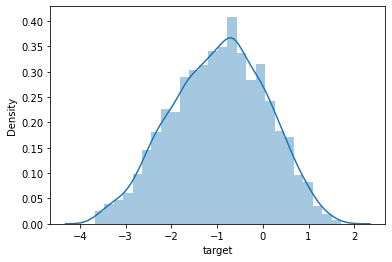

In [10]:
fig, ax = plt.subplots()
sns.distplot(train_data['target'])
plt.show()

Observation:
Target value is in range between -4 to +2.
The distribution of targets between -2 & 0 is high.

#Distribution of Standard Error:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


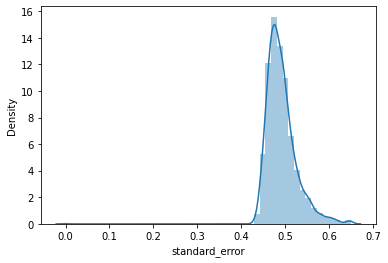

In [12]:
fig, ax = plt.subplots()
sns.distplot(train_data['standard_error'])
plt.show()

Observation:
standard value is in range between 0.4 & 0.68


#Distribution of Standard Error & Target

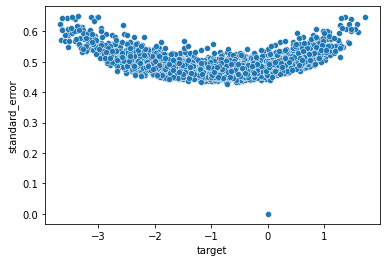

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(x=train_data['target'], y=train_data['standard_error'])
plt.show()

Observation:
The target  values are having high standard errors with values greater than 1 and less than -3